In [14]:
#6 -> KNN on glass dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [15]:
df = pd.read_csv('glass.csv')
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [16]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [18]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [19]:
df.shape

(214, 10)

In [20]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [21]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [27]:
#handle missing values but not present
imputer = SimpleImputer(strategy = 'median')
df[df.columns] = imputer.fit_transform(df[df.columns])

In [28]:
#scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Type',axis = 1))

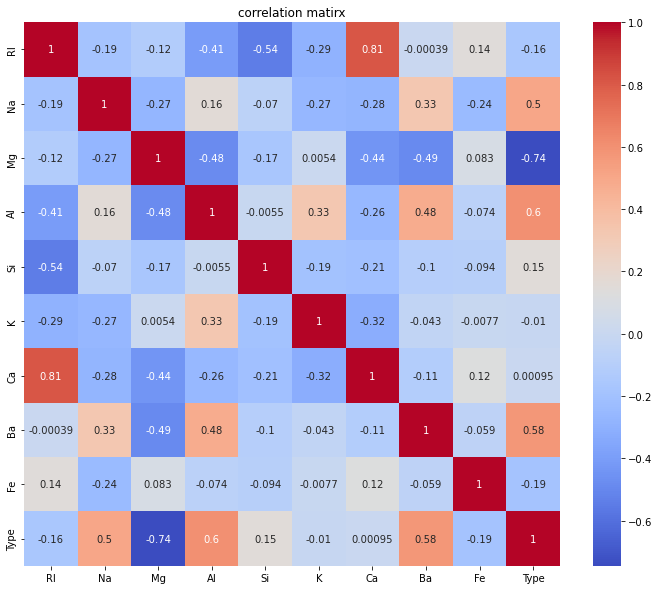

In [30]:
#plot correlation Matrix
plt.figure(figsize = (12,10))
correlation = df.corr()
sns.heatmap(correlation,annot = True,cmap = "coolwarm")
plt.title('correlation matirx')
plt.show()

In [32]:
#assign features target 
X = X_scaled
y = df['Type'].values
print(X)
print(y)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 5. 5. 5. 5. 

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [34]:
#defining a manhattan and euclidean dist
def custom_euclidean(x1,x2):
    return np.sqrt(np.sum((x1-x2) ** 2))
def custom_manhattan(x1,x2):
    return np.sum(np.abs(x1-x2))

In [36]:
#intialize knn classifier
k = 3
clf_custom_euclidean = KNeighborsClassifier(n_neighbors = k,metric = custom_euclidean)
clf_custom_manhattan = KNeighborsClassifier(n_neighbors = k,metric = custom_manhattan)

In [37]:
#fitt knn
clf_custom_euclidean.fit(X_train,y_train)
clf_custom_manhattan.fit(X_train,y_train)


KNeighborsClassifier(metric=<function custom_manhattan at 0x000001A338E2F700>,
                     n_neighbors=3)

In [38]:
#make predictions
prediction_custom_euclidean = clf_custom_euclidean.predict(X_test)
prediction_custom_manhattan = clf_custom_manhattan.predict(X_test)

In [39]:
#calculate accuracy
accuracy_custom_euclidean = accuracy_score(y_test,prediction_custom_euclidean)
accuracy_custom_manhattan = accuracy_score(y_test,prediction_custom_manhattan)
print("accuracy_custom_euclidean : ",accuracy_custom_euclidean)
print("accuracy_custom_manhattan : ",accuracy_custom_manhattan)


accuracy_custom_euclidean :  0.7674418604651163
accuracy_custom_manhattan :  0.7674418604651163


In [40]:
confusion_custom_euclidean = confusion_matrix(y_test,prediction_custom_euclidean)
confusion_custom_manhattan = confusion_matrix(y_test,prediction_custom_manhattan)
print("confusion_custom_euclidean: ",confusion_custom_euclidean)
print("confusion_custom_manhattan : ",confusion_custom_manhattan)

confusion_custom_euclidean:  [[ 9  2  0  0  0  0]
 [ 3 11  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]
confusion_custom_manhattan :  [[10  1  0  0  0  0]
 [ 5  9  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


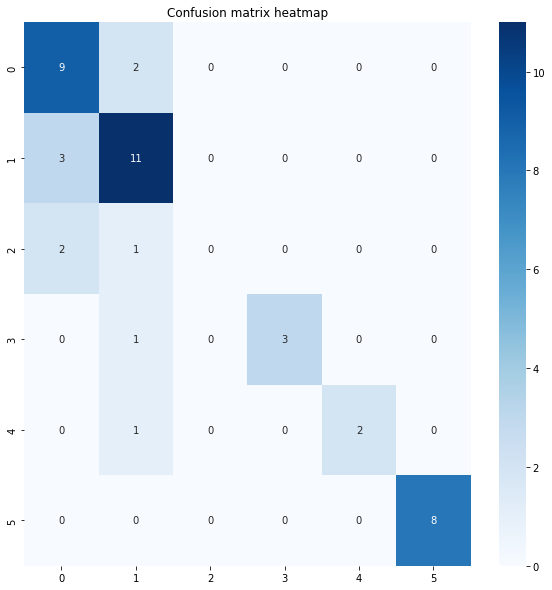

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_custom_euclidean,annot = True,cmap = 'Blues')
plt.title('Confusion matrix heatmap')
plt.show()

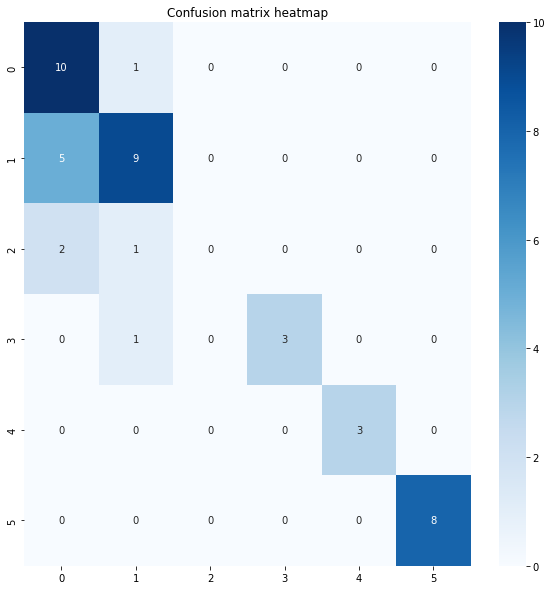

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_custom_manhattan,annot = True,cmap = 'Blues')
plt.title('Confusion matrix heatmap')
plt.show()